# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
# Importar librerías aquí
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

In [ ]:
# Importar datos aquí
df = pd.read_csv('retail.csv')
df.head
df2 = df.dropna()
df2_sorted=df2.sort_values('Sales', ascending=0)
df2_sorted


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [ ]:
Sales_mean = df2["Sales"].mean
Sales_mean


<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     658119
1     115037
2      90048
3      83976
4      78924
5      77792
7      71208
8      60311
9      56829
10     56828
12     34980
13     34408
14     27486
15     26903
16     26028
17     25012
18     24402
19     22234
20     21464
21     21384
22     19060
23     18201
24     16592
Name: Sales, dtype: int64>

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

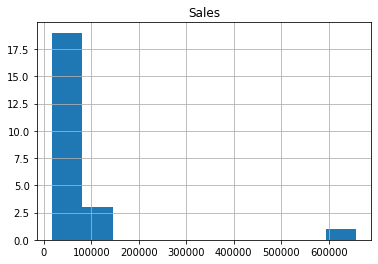

In [ ]:
df2.hist("Sales")

Observamos que la mayoria de las companias realizaron ventas de $100000 USD

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

array([[<AxesSubplot:title={'center':'Stores'}>]], dtype=object)

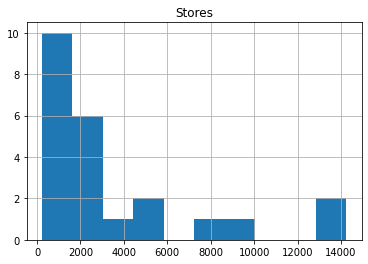

In [ ]:
df2.hist("Stores")

Aqui observamos que la mayoria de las companias tienen al rededor de 2000 tiendas

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

<AxesSubplot:xlabel='Stores', ylabel='Sales'>

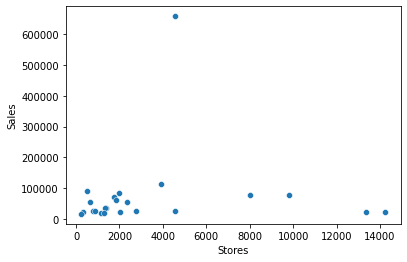

In [ ]:
sns.scatterplot(data=df2, x= "Stores", y="Sales")


En conclusión vemos que sí hay una relacion directa entre el numero de tiendas y la cantidad de ventas, es de resaltar la diferencia que marca Walmart que solo con poco más de cuatro mil tiendas genera ventas que superan ampliamente las de sus competidores

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
range = df2["Sales"].max() - df2["Sales"].min()
range

641527

El rango entre las ventas es de 641527

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Stores', ylabel='Sales'>

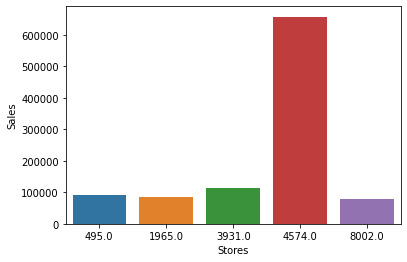

In [ ]:
x = df2_sorted['Stores'][0:5] #Aplicamos slicing como en una lista de Python.
y = df2_sorted['Sales'][0:5]

sns.barplot(x,y) 

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [ ]:
df2.groupby(["Category"]).sum().sort_values("Sales", ascending=False)



,Sales,Stores,Sales/Avg. Store,Store Count Growth
Category,,,,
Supercenters,745919,6577.0,180.370496,0.087294
Grocery,297164,12026.0,207.678590,0.157494
Drug Stores,184202,22368.0,24.662535,0.241432
Home Improvement,144287,3793.0,76.047670,0.019520
Warehouse Club,90048,495.0,187.795620,0.066810
Warehouse Clubs,56828,655.0,87.293395,0.012365
Department Stores,45088,2058.0,46.795602,0.088850
Dollar Stores,43698,27600.0,3.332804,0.212039
Electronics,34980,1389.0,24.685956,-0.038754


Obtenemos que la categoria que mas vende son los groceries

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

<AxesSubplot:xlabel='Stores', ylabel='Sales'>

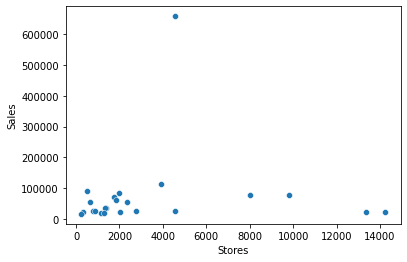

In [ ]:
sns.scatterplot(data=df2, x= "Stores", y="Sales")


Sin duda alguna es Waltmart

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

## III. Tus propias preguntas

### 10. Pregunta

### 11. Pregunta

### 12. Pregunta

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4c61d62b-04a5-459c-8181-ce7204eec77e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>